### **1. Loading the data**

In [49]:
import pandas as pd
import numpy as np

import os

from PIL import Image
import matplotlib.pyplot as plt

In [15]:
path = 'data/.raw-img/'

### **What are the file extensions?**

In [16]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}. Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print(len(file_extensions))
print(set(file_extensions))

Reading images from data/.raw-img/. Found 0 files.
Reading images from data/.raw-img/cane. Found 4863 files.
Reading images from data/.raw-img/cavallo. Found 2623 files.
Reading images from data/.raw-img/elefante. Found 1446 files.
Reading images from data/.raw-img/farfalla. Found 2112 files.
Reading images from data/.raw-img/gallina. Found 3098 files.
Reading images from data/.raw-img/gatto. Found 1668 files.
Reading images from data/.raw-img/mucca. Found 1866 files.
Reading images from data/.raw-img/pecora. Found 1820 files.
Reading images from data/.raw-img/ragno. Found 4821 files.
Reading images from data/.raw-img/scoiattolo. Found 1862 files.
26179
{'.jpg', '.png', '.jpeg'}


### **What are the image sizes, extension and mode?**

In [19]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        print(f"Reading images from {root}. Found {len(files)} files.")
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension, 
                                    "size": img.size, 
                                    "mode": img.mode, 
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [21]:
%%time

images_data = read_image_files(path)

df = load_into_df(images_data)

df.head()

Reading images from data/.raw-img/. Found 0 files.
Reading images from data/.raw-img/cane. Found 4863 files.
Reading images from data/.raw-img/cavallo. Found 2623 files.
Reading images from data/.raw-img/elefante. Found 1446 files.
Reading images from data/.raw-img/farfalla. Found 2112 files.
Reading images from data/.raw-img/gallina. Found 3098 files.
Reading images from data/.raw-img/gatto. Found 1668 files.
Reading images from data/.raw-img/mucca. Found 1866 files.
Reading images from data/.raw-img/pecora. Found 1820 files.
Reading images from data/.raw-img/ragno. Found 4821 files.
Reading images from data/.raw-img/scoiattolo. Found 1862 files.
CPU times: total: 10.9 s
Wall time: 2min 30s


,file_name,extension,size,mode,dir
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane


In [22]:
df["extension"].value_counts()

extension
.jpeg    24209
.jpg      1919
.png        51
Name: count, dtype: int64

In [23]:
df["mode"].value_counts()

mode
RGB     26128
RGBA       49
L           1
CMYK        1
Name: count, dtype: int64

In [32]:
df["mode"].unique()

array(['RGB', 'RGBA', 'L', 'CMYK'], dtype=object)

In [24]:
df["dir"].value_counts()

dir
data/.raw-img/cane          4863
data/.raw-img/ragno         4821
data/.raw-img/gallina       3098
data/.raw-img/cavallo       2623
data/.raw-img/farfalla      2112
data/.raw-img/mucca         1866
data/.raw-img/scoiattolo    1862
data/.raw-img/pecora        1820
data/.raw-img/gatto         1668
data/.raw-img/elefante      1446
Name: count, dtype: int64

In [33]:
df["dir"].unique()

array(['data/.raw-img/cane', 'data/.raw-img/cavallo',
       'data/.raw-img/elefante', 'data/.raw-img/farfalla',
       'data/.raw-img/gallina', 'data/.raw-img/gatto',
       'data/.raw-img/mucca', 'data/.raw-img/pecora',
       'data/.raw-img/ragno', 'data/.raw-img/scoiattolo'], dtype=object)

In [28]:
df["size"].value_counts()

size
(300, 225)    4397
(300, 200)    3281
(300, 300)    1192
(300, 169)    1048
(640, 426)     694
              ... 
(640, 463)       1
(463, 640)       1
(520, 640)       1
(543, 640)       1
(180, 213)       1
Name: count, Length: 1002, dtype: int64

In [31]:
df["size"].nunique()

1002

In [34]:
df["size"].unique()

array([(300, 225), (300, 214), (153, 300), ..., (246, 205), (263, 257),
       (180, 213)], dtype=object)

In [35]:
df.head()

,file_name,extension,size,mode,dir
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane


In [39]:
df["width"] = df['size'].apply(lambda size: size[0])
df["height"] = df['size'].apply(lambda size: size[1])

df.head()

,file_name,extension,size,mode,dir,width,height
0,OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225
1,OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg,.jpeg,"(300, 214)",RGB,data/.raw-img/cane,300,214
2,OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg,.jpeg,"(153, 300)",RGB,data/.raw-img/cane,153,300
3,OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225
4,OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,.jpeg,"(300, 225)",RGB,data/.raw-img/cane,300,225


In [40]:
df.describe()

,width,height
count,26179.000000,26179.000000
mean,320.038810,252.630162
std,196.935326,148.403298
min,60.000000,57.000000
25%,300.000000,200.000000
50%,300.000000,225.000000
75%,300.000000,300.000000
max,6720.000000,6000.000000


<Axes: ylabel='Density'>

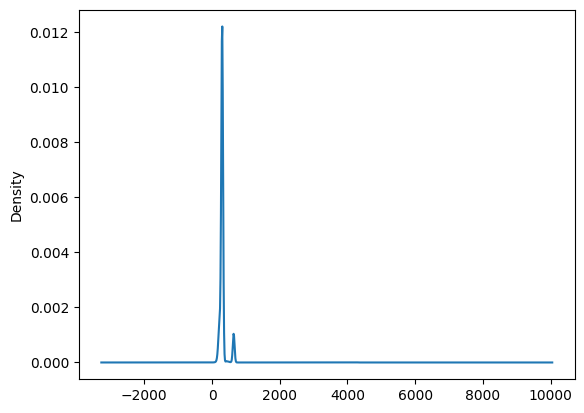

In [44]:
df['width'].plot(kind="kde")

<Axes: >

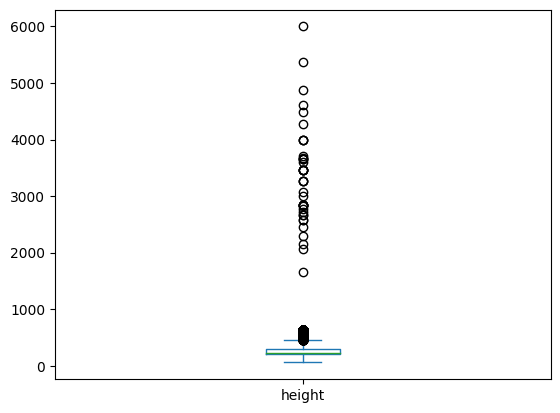

In [45]:
df['height'].plot(kind="box")

In [47]:
df.loc[df.width==df.width.min()]

,file_name,extension,size,mode,dir,width,height
5105,OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
5444,OIP-bT32YLeLizQNLnu4lcVGAAAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
6105,OIP-jqjnI-BWj-9BkPeqZetiggAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
6147,OIP-K8QgBSuaAkfMGBB_1C84uQAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57
7431,OIP-zVErTw8mSPohwjPxvw6ehgAAAA.jpeg,.jpeg,"(60, 57)",RGB,data/.raw-img/cavallo,60,57


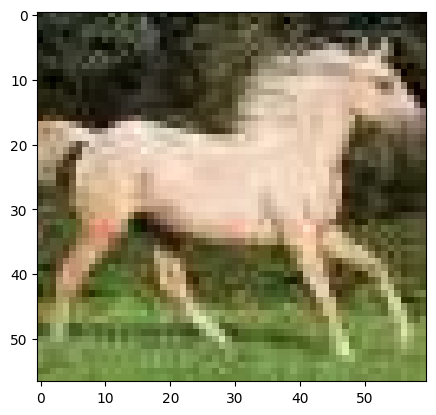

In [51]:
path = "data/.raw-img/cavallo/OIP-4UmK-NKWl1fwEK9GfBSGKAAAAA.jpeg"

img = Image.open(path)

plt.imshow(img)

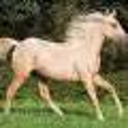

In [52]:
size = (128, 128)

img.resize(size)